<a href="https://colab.research.google.com/github/daniellopes04/perfomance-evaluation/blob/main/danielSousa_Cap1_Exs33e37_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# George Rappel

## Cap 1, Exs 33 e 37 (Ver abaixo)

### Ex. 33 - Simulações de retirada de cartas com reinserção no baralho:

*Cards are drawn from a standard deck, with replacement, until an ace appears.
Simulate the mean and variance of the number of cards required.*

In [ ]:
import numpy as np
import random
import math
import statistics
from scipy import stats

cartas_baralho = 52
ases = [1, 14, 27, 40]

n_simulacoes = 10000
n_retiradas = []


# Faz N simulações de retiradas
for i in range(n_simulacoes):

  # Conta o numero de retiradas ate sair um As
  n_atual = 1
  j = random.randint(1, cartas_baralho)
  while j not in ases:
    n_atual += 1
    j = random.randint(1, cartas_baralho)
  
  # Salva o numero de retiradas em um array pra fazer o calculo
  n_retiradas.append(n_atual)

  
var = statistics.variance(n_retiradas)
mean = statistics.mean(n_retiradas)
stdev = statistics.stdev(n_retiradas)

print("Variância: " + str(var))
print("Média: " + str(mean))
print("Intervalo de Confiança da Média (95%): " + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(n_retiradas)) )))
print("Samples = %s" % n_simulacoes)

Variância: 153.19524423442346
Média: 12.9227
Intervalo de Confiança da Média (95%): (12.680111207543977, 13.165288792456025)
Samples = 10000


### Ex. 37 - Simular média e variância de acidentes por dia
Do exercicio 1.28: *On any day, the number of accidents on the highway has a Poisson distribution with parameter Λ. The parameter Λ varies from day to day and is itself a random
variable. Find the mean and variance of the number of accidents per day when
Λ is uniformly distributed on (0, 3).*

In [ ]:
import numpy as np
import statistics
from scipy import stats

generator = np.random.default_rng() # Gerador aleatorio do numpy
R = 100
n_simulacoes = 1000
medias = []

for i in range(R):
  acidentes_array = []
  for j in range(n_simulacoes):
    A = np.random.uniform(0, 3)
    n_acidentes = np.random.poisson(A)
    acidentes_array.append(n_acidentes)
  medias.append(statistics.mean(acidentes_array))

var = statistics.variance(medias)
mean = statistics.mean(medias)
stdev = statistics.stdev(medias)

print("Variância: " + str(var))
print("Media: " + str(mean))
print("Deviation: " + str(stdev))
print("Intervalo de Confiança da Média (95%): " + str(stats.norm.interval(0.95, loc=mean, scale = stdev / np.sqrt(len(medias)) )))

# Intervalo de Confiança segundo a resposta do Leonardo https://stackoverflow.com/c/ad-2020-2/a/64/7
z = 1.96
std_err = stdev/np.sqrt(len(medias))
intervalo_de_confianca = (mean - z * std_err, mean + z * std_err)
print("Intervalo de Confiança (95%) fórmula do Leonardo: " + str(intervalo_de_confianca) )


Variância: 0.0021165555555555543
Media: 1.4939
Deviation: 0.046006038251033464
Intervalo de Confiança da Média (95%): (1.4848829821956602, 1.5029170178043398)
Intervalo de Confiança (95%) fórmula do Leonardo: (1.4848828165027974, 1.5029171834972026)


Plotando os acidentes, vemos uma poisson:

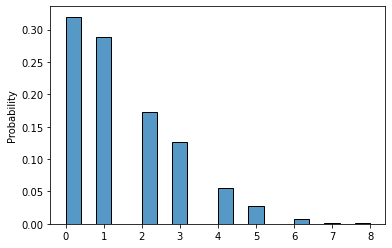

In [ ]:
import seaborn as sns
sns.histplot(acidentes_array, stat='probability');

Porém, plotando as médias, observamos uma curva normal. Isso se dá pelo Teorema Centrald do Limite, como comentado em aula.

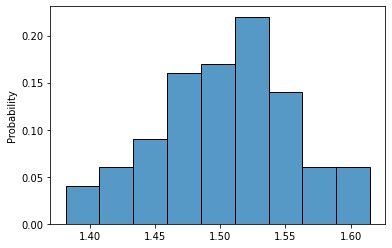

In [ ]:
import seaborn as sns

sns.histplot(medias, stat='probability');